In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [3]:
query = "Select * from Customers limit 4;"
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = "Select * from salesdata limit 3;"
read_query(query)


,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [5]:
query = """Select s.CustomerID,c.firstname,s.SaleDate,s.TotalPrice 
from salesdata s
join customers c
on c.CustomerID = s.CustomerID
order by s.CustomerID
limit 5;"""


read_query(query)

,CustomerID,firstname,SaleDate,TotalPrice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [6]:
query = """Select CustomerID,
sum(TotalPrice) as Expenditure 
from salesdata
group by CustomerID;"""


read_query(query)

,CustomerID,Expenditure
0,C-2023-100-1,9933032.00
1,C-2023-100-10,9779316.00
2,C-2023-100-100,9889393.00
3,C-2023-100-101,9168084.00
4,C-2023-100-102,10315608.00
...,...,...
195,C-2023-100-95,8826287.00
196,C-2023-100-96,9996920.00
197,C-2023-100-97,10432046.00
198,C-2023-100-98,8863324.00


In [7]:
query = """Select t.CustomerID , c.firstname , t.Expenditure
from
(Select CustomerID,
sum(TotalPrice) as Expenditure 
from salesdata
group by CustomerID) t
join Customers c
on t.CustomerID =c.CustomerID
order by Expenditure desc
limit 10;"""


top_annual_customers = read_query(query)

In [8]:
Customers_names = top_annual_customers['firstname'].values

In [9]:
Customers_names

array(['Veer', 'Priyansh', 'Riya', 'Vanya', 'Dhruv', 'Tarini', 'Yuvraj ',
       'Rhea', 'Darshit', 'Prerak'], dtype=object)

In [10]:
top_annual_customers['Expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [11]:
## Change decimal to float
top_annual_customers['Expenditure']=top_annual_customers['Expenditure'].astype(float)

In [12]:
Customer_exp = top_annual_customers['Expenditure'].values

In [13]:
Customer_exp

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

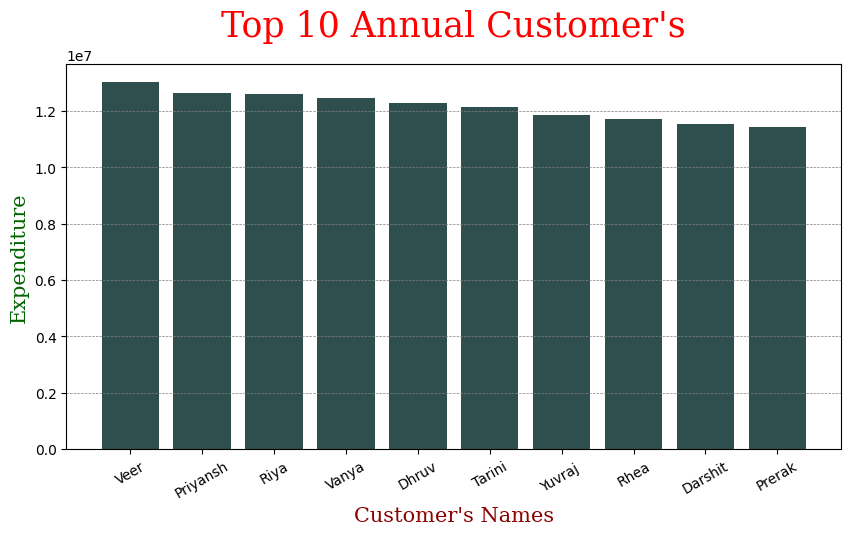

In [14]:
font1 = {"family":"serif","size":"25",'color':'Red'}
fontx = {"family":"serif","size":"15",'color':'darkred'}
fonty = {"family":"serif","size":"15",'color':'darkgreen'}

plt.figure(figsize=(10,5))
plt.bar(height= Customer_exp, x=Customers_names,color="darkslategray")
plt.title("Top 10 Annual Customer's",fontdict=font1,pad="20")

plt.xticks(rotation=30)
plt.xlabel("Customer's Names",fontdict=fontx)
plt.ylabel("Expenditure",fontdict=fonty)
plt.grid(axis= "y",color = "Gray", linestyle = "--" , linewidth = 0.5)

# Using CMAP

In [15]:
cmap_value = np.linspace(0.3,1,10)

In [16]:
camp = plt.cm.summer(cmap_value)

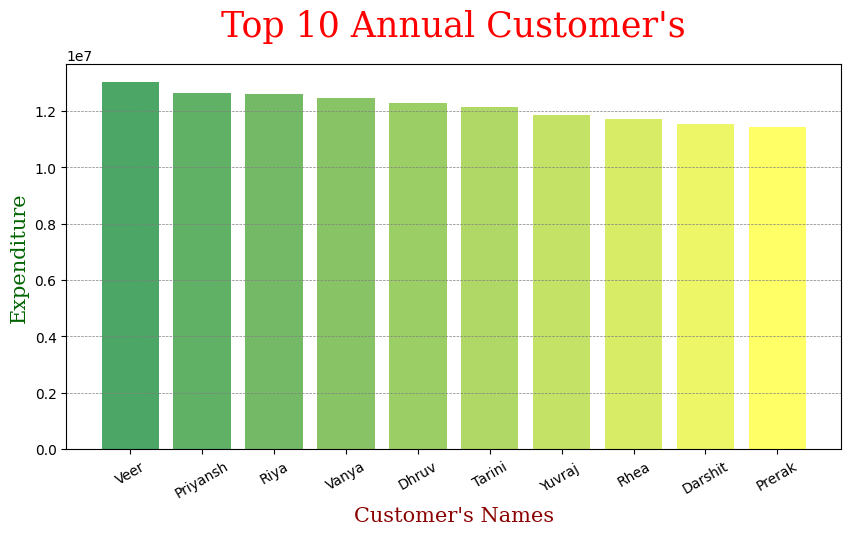

In [17]:
font1 = {"family":"serif","size":"25",'color':'Red'}
fontx = {"family":"serif","size":"15",'color':'darkred'}
fonty = {"family":"serif","size":"15",'color':'darkgreen'}

plt.figure(figsize=(10,5))
plt.bar(height= Customer_exp, x=Customers_names,color=camp)
plt.title("Top 10 Annual Customer's",fontdict=font1,pad="20")

plt.xticks(rotation=30)
plt.xlabel("Customer's Names",fontdict=fontx)
plt.ylabel("Expenditure",fontdict=fonty)
plt.grid(axis= "y",color = "Gray", linestyle = "--" , linewidth = 0.5)

In [18]:
query = 'select * from salesdata limit 10;'
read_query(query=query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [19]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;'''

df = read_query(query=query)

In [20]:
df.info

<bound method DataFrame.info of   monthname(s.saledate) firstname  totalsales
0               January    Bhavin  5775952.00
1               January    Nitara  5567036.00
2               January      Myra  4888628.00
3               January     Renee  3924716.00
4               January     Shray  3719152.00
5               January    Yuvaan  3348039.00
6               January     Anika  3152408.00
7               January     Kiaan  3136727.00
8               January    Yasmin  3135779.00
9               January     Hiran  3104523.00>

In [21]:
firstname =df['firstname'].values

In [22]:
df['totalsales'] =df['totalsales'].values.astype(float)
df['totalsales'].values

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

<BarContainer object of 10 artists>

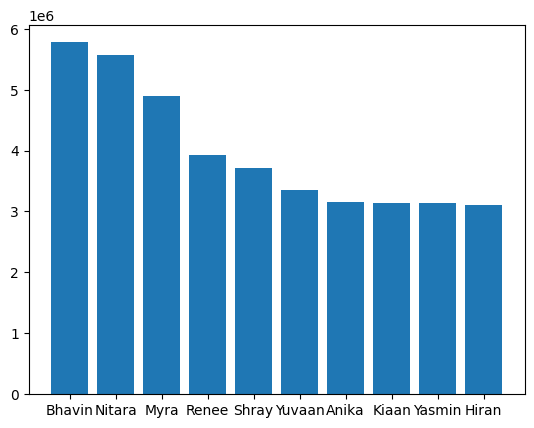

In [23]:
plt
plt.bar(height=df['totalsales'].values , x= firstname )

In [24]:
cmap_value =np.linspace(0.3,1,10)
cmap = plt.cm.BuGn(cmap_value)

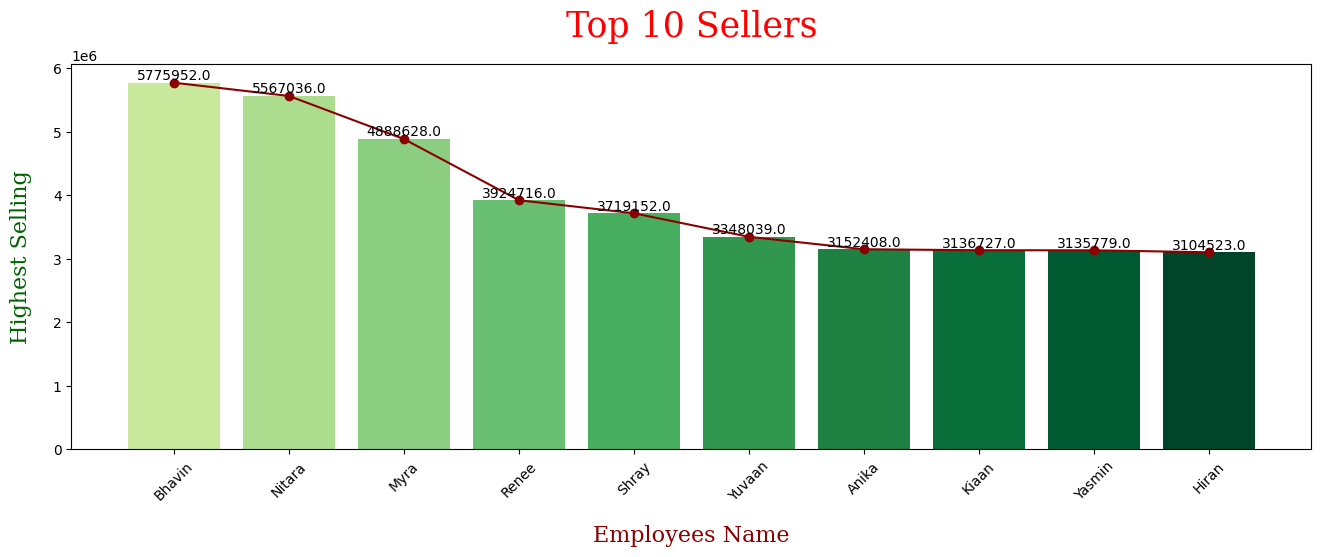

In [25]:
cmap_value =np.linspace(0.3,1,10)
cmap = plt.cm.YlGn(cmap_value)


#fonts and color
font = {'family':'serif','color':'darkred','weight':'normal','size':16}
fonty = {'family':'serif','color':'darkgreen','size':16}

plt.figure(figsize=(16,5))
plt.plot(firstname,df['totalsales'].values,marker = 'o',color = 'darkred')
plt.bar(height=df['totalsales'].values , x= firstname , color =cmap )

#giving Title
plt.title('Top 10 Sellers',pad=20,fontdict= font1)

#giving Labels
plt.xlabel('Employees Name',labelpad=15,fontdict=font)
plt.ylabel("Highest Selling",labelpad=15,fontdict=fonty)

#Using Ticks
plt.xticks(rotation=45)

#Giving Annotation
for i in range(len(firstname)):
    
    plt.annotate(text=df['totalsales'].values[i],xy=(i,df['totalsales'].values[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center 

plt.show()

<BarContainer object of 10 artists>

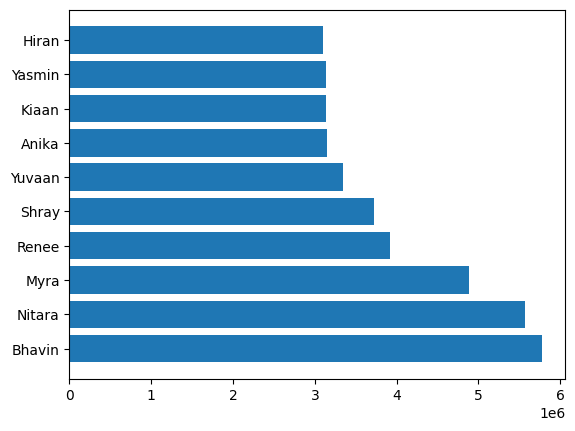

In [26]:
h_selling = df['totalsales'].values
plt.barh(y=firstname,width=h_selling)

In [27]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;'''

df = read_query(query=query)
df

,monthname(s.saledate),firstname,totalsales
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [28]:
firstname = df['firstname'].values

In [29]:
df['totalsales'] = df['totalsales'].astype(float)
H_salary = df['totalsales'].values

H_salary

array([5775952., 5567036., 4888628., 3924716., 3719152., 3348039.,
       3152408., 3136727., 3135779., 3104523.])

<BarContainer object of 10 artists>

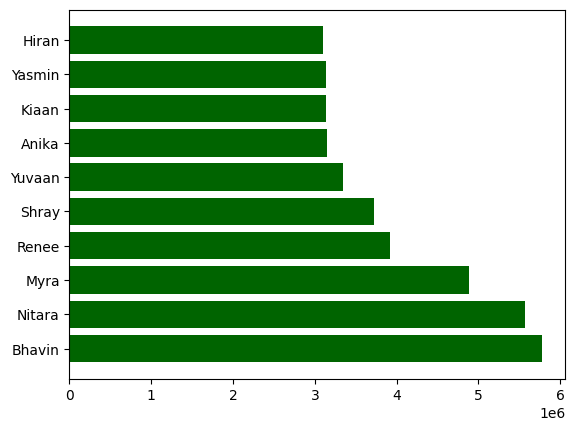

In [30]:
plt.barh(y=firstname,width= H_salary,color='darkgreen')

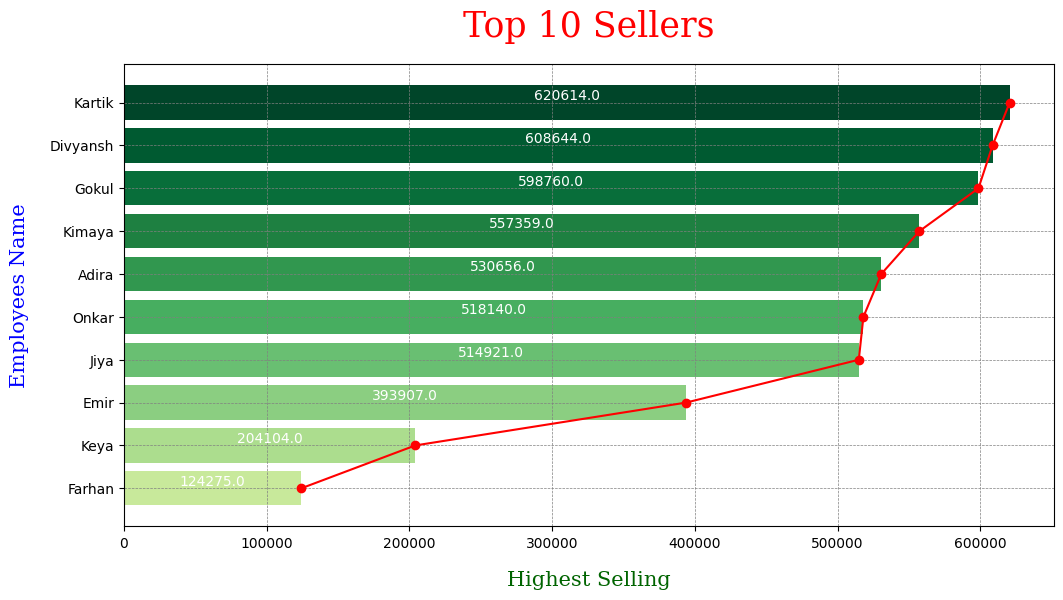

In [31]:
query ='''select monthname(s.saledate) ,e.firstname ,sum(s.TotalPrice) as totalsales
from salesdata s
join employees e
on s.EmployeeID = e.EmployeeID
where monthname(s.saledate) ="january"
group by monthname(s.saledate),e.firstname
order by totalsales
limit 10;'''

df = read_query(query=query)
df

firstname = df['firstname'].values
df['totalsales'] = df['totalsales'].astype(float)
H_salary = df['totalsales'].values

cam_value = np.linspace(0.3,1,10)
cm = plt.cm.YlGn(cam_value)


f_title = {'family':'serif','size':'25','color':'Red'}
f_xlable = {'family':'serif','size':'15','color':'darkgreen'}
f_ylable = {'family':'serif','size':'15','color':'blue'}


plt.figure(figsize=(12,6))

plt.plot(H_salary,firstname,color='red',marker='o')
plt.barh(y=firstname,width= H_salary,color=cm)
plt.title('Top 10 Sellers',pad = 20,fontdict=f_title)
plt.xlabel('Highest Selling',fontdict=f_xlable,labelpad=15)
plt.ylabel('Employees Name',fontdict=f_ylable,labelpad=15)
plt.grid(color ='gray',linestyle='--',linewidth=0.5)


for i in range(len(H_salary)):
    
    plt.annotate(text=H_salary[i],xy=(H_salary[i]/2,i),color='white',
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center 

plt.show()


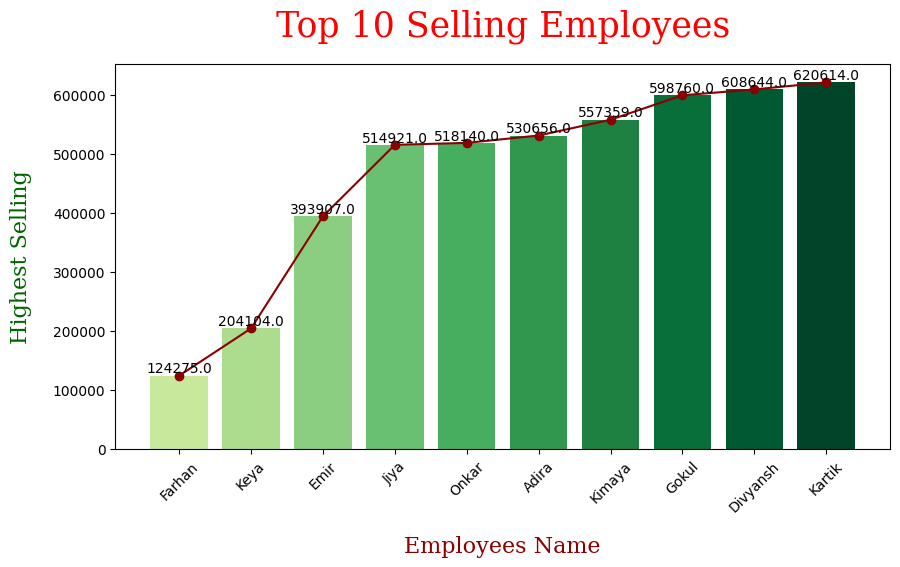

In [32]:
cmap_value =np.linspace(0.3,1,10)
cmap = plt.cm.YlGn(cmap_value)


#fonts and color
font = {'family':'serif','color':'darkred','weight':'normal','size':16}
fonty = {'family':'serif','color':'darkgreen','size':16}

plt.figure(figsize=(10,5))
plt.plot(firstname,H_salary,marker = 'o',color = 'darkred')
plt.bar(height=H_salary , x= firstname , color =cmap )

#giving Title
plt.title('Top 10 Selling Employees',pad=20,fontdict= font1)

#giving Labels
plt.xlabel('Employees Name',labelpad=15,fontdict=font)
plt.ylabel("Highest Selling",labelpad=15,fontdict=fonty)

#Using Ticks
plt.xticks(rotation=45)

#Giving Annotation
for i in range(len(firstname)):
    
    plt.annotate(text=H_salary[i],xy=(i,H_salary[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center 

plt.show()

# 1. Provide a visual representation of our annual sales performance over time?

In [33]:
query='''select Months , M_sales
        from (select month(SaleDate),monthname(SaleDate) as Months,sum(TotalPrice) as M_sales
from salesdata
group by month(SaleDate),Months
order by month(SaleDate)) t;'''

df = read_query(query=query)
df

,Months,M_sales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [34]:
Months = df['Months'].values
df['M_sales']=df['M_sales'].astype(float)
Monthly_sales=df['M_sales'].values
Monthly_sales

monthly_avg=df['M_sales'].mean()

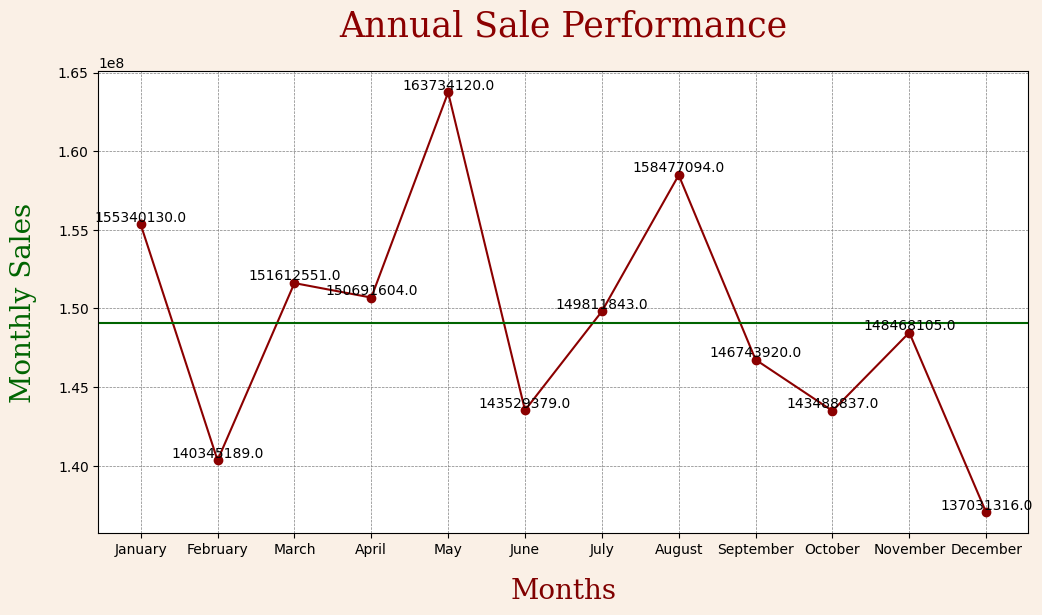

In [35]:
plt.figure(figsize=(12,6),facecolor='linen')

font={'family':'serif','size':25,'color':'darkred'}
fontx={'family':'serif','size':20,'color':'maroon'}
fonty={'family':'serif','size':20,'color':'darkgreen'}


plt.plot(Months,Monthly_sales,color='darkred',marker='o')
plt.title('Annual Sale Performance',fontdict=font,pad=25)
plt.xlabel("Months",fontdict=fontx,labelpad=15)
plt.ylabel("Monthly Sales",fontdict=fonty,labelpad=15)
plt.axhline(y=monthly_avg,color='darkgreen')
for i in range(len(Months)):
    plt.annotate(text=Monthly_sales[i],xy=(i,Monthly_sales[i]),
                horizontalalignment='center',
                verticalalignment='bottom')

plt.grid(linestyle='--',color='gray',linewidth=0.5)
plt.show()

# 3. Explore the month-over-month growth rate in sales

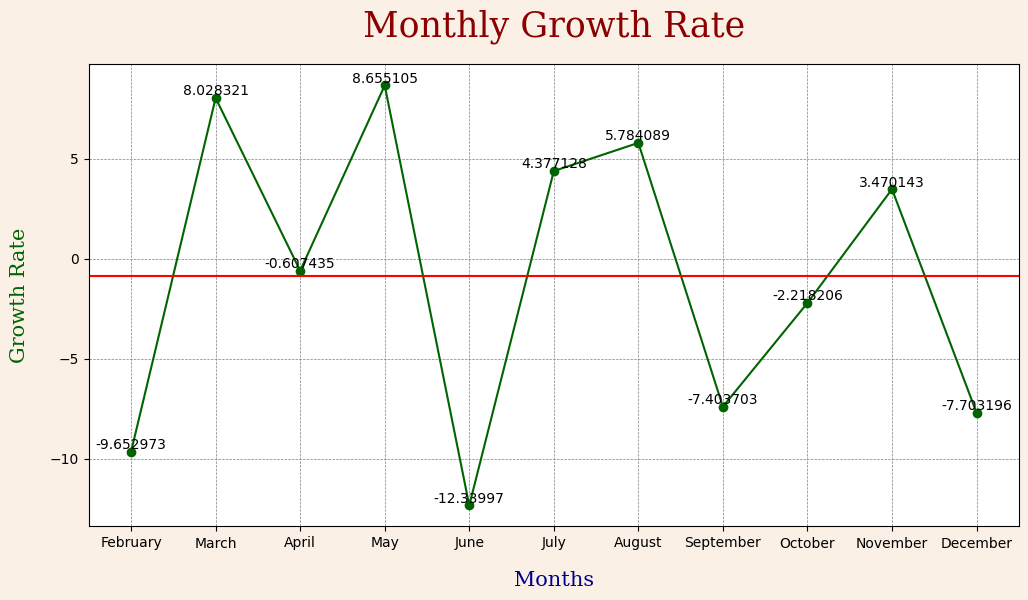

In [36]:
query = '''select months,T_sales,
lag(T_sales) over(),
100*(T_sales-lag(T_sales) over())/lag(T_sales) over() as Growth_Rate
from (select month(SaleDate),monthname(SaleDate) as months,sum(TotalPrice) as T_sales
from salesdata
group by month(SaleDate),months
order by month(SaleDate)) t;'''

G_rate=read_query(query=query)
Month=G_rate['months'].values
G_rate['Growth_Rate']=G_rate['Growth_Rate'].astype(float)
Growth=G_rate['Growth_Rate'].values
Avg_growth=G_rate['Growth_Rate'].mean()

plt.figure(figsize=(12,6),facecolor='linen')
plt.plot(Month,Growth,color='darkgreen',marker='o')
plt.axhline(Avg_growth,color='red')
plt.title("Monthly Growth Rate",fontdict={'family':'serif','size':25,'color':'darkred'},pad=20)
plt.xlabel("Months",fontdict={'family':'serif','size':15,'color':'darkblue'},labelpad=15)
plt.ylabel("Growth Rate",fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)

for i in range(len(Month)):
    plt.annotate(text=Growth[i],xy=(i,Growth[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')
    
    

plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 4. identify the top-performing sales representatives based on their total sales volume

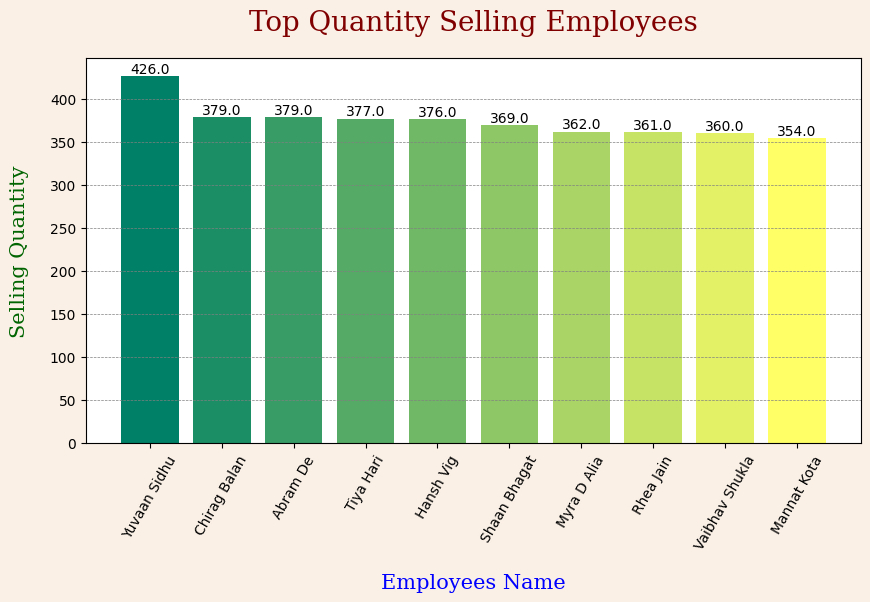

In [37]:
#Sql Query
query='''select 
	e.EmployeeID, concat(e.FirstName,' ',e.Lastname)as Emp_name,sum(s.Quantity) as Quantites,sum(s.TotalPrice) as Total_sales
from
	salesdata s
join
	employees e
on
	e.EmployeeID=s.EmployeeID
group by
	e.EmployeeID
order by
	Quantites desc
limit 10;'''

#Execute Query
Top_perf=read_query(query=query)

#Taking Variables
Top_emp=Top_perf['Emp_name'].values
S_quantities=Top_perf['Quantites'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(10,5),facecolor='linen')
plt.bar(height=S_quantities,x=Top_emp,color=cmap)
plt.title('Top Quantity Selling Employees',fontdict={'family':'serif','color':'maroon','size':20},pad=20)
plt.xlabel('Employees Name',fontdict={'family':'serif','color':'blue','size':15},labelpad=15)
plt.ylabel('Selling Quantity',fontdict={'family':'serif','color':'darkgreen','size':15},labelpad=15)
plt.xticks(rotation=60)

#Annotate graph
for i in range(len(Top_emp)):
    plt.annotate(text=S_quantities[i],xy=(i,S_quantities[i]),
                 horizontalalignment='center',
				 verticalalignment='bottom')

plt.grid(axis='y',linestyle="--",linewidth=0.5,color='gray')
plt.show()

# 5. What are the total sales made by each employee?

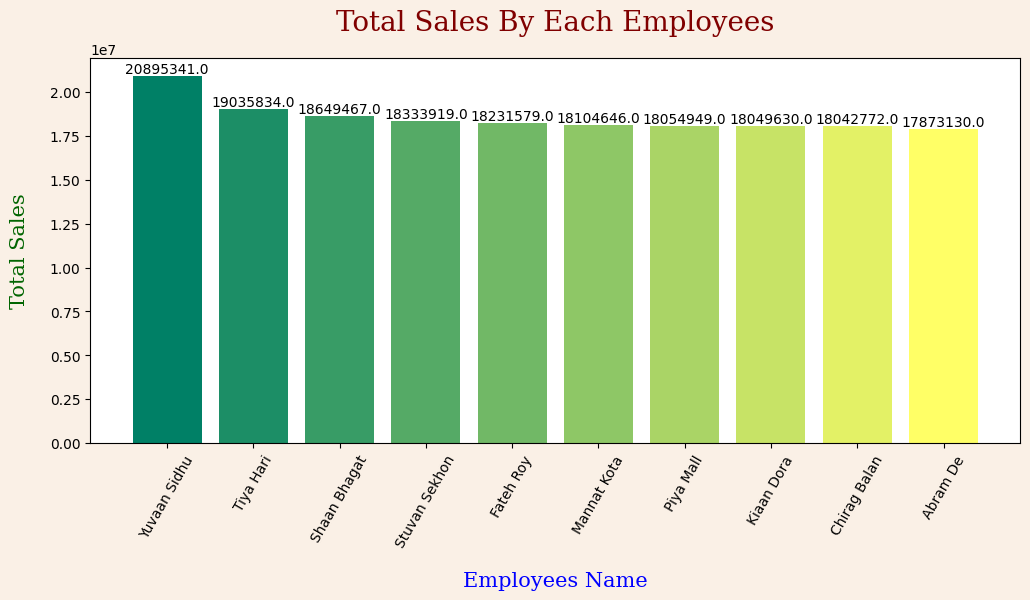

In [80]:
#Sql Query
query='''Select s.EmployeeID , concat(e.FirstName," ",e.LastName) as Emp_Name,sum(s.TotalPrice) as T_sales
from employees e
join salesdata s
on e.EmployeeID=s.EmployeeID
group by s.EmployeeID,Emp_Name
order by T_sales desc
limit 10;'''

#Execute Query
Emp_sales=read_query(query=query)

#Creating Variables
Employees=Emp_sales['Emp_Name'].values
T_sales=Emp_sales['T_sales'].astype(float).values

#Cmap Values
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,5),facecolor='linen')
plt.bar(height=T_sales,x=Employees,color=cmap)
plt.title('Total Sales By Each Employees',fontdict={'family':'serif','size':20,'color':'maroon'},pad=20)
plt.xlabel('Employees Name',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.ylabel('Total Sales',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=60)

#Annotating Graph
for i in range(len(Employees)):
    plt.annotate(text=T_sales[i],xy=(i,T_sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

#plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()


# 6. Which category has the highest total sales?

,Categoryname,CategoryID,Total_Quantity,Total_Price
0,Electronics and Gadgets,500100,6202,319374417.00
1,Outdoor and Sports Equipment,500102,6167,231074739.00
2,Books and Educational Materials,500104,6056,282897933.00
3,Pet Supplies and Accessories,500105,5965,361848986.00
4,Health and Wellness Products,500103,5926,324761329.00
5,Home and Kitchen Appliances,500101,5820,269316684.00


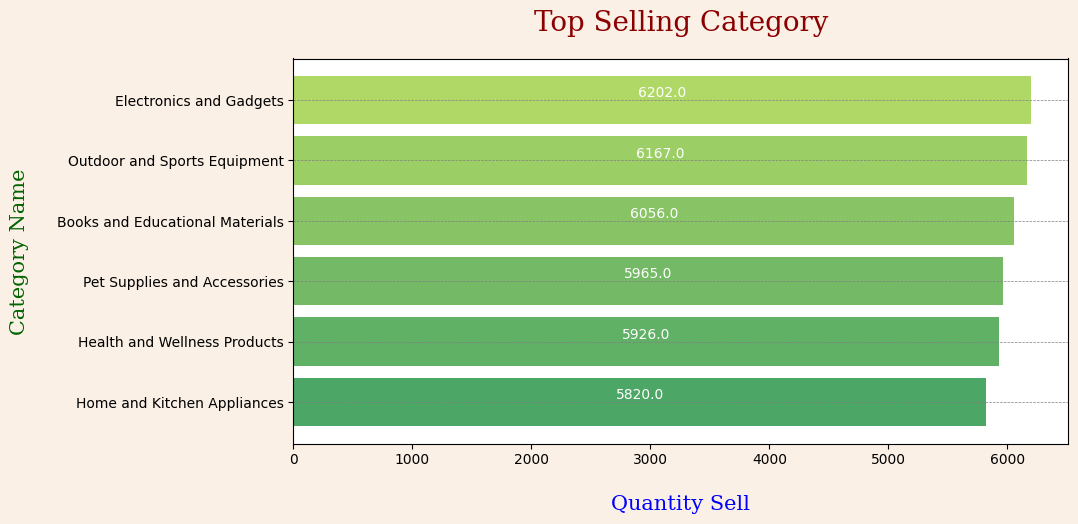

In [96]:
#Sql Query
query = '''select 
    c.Categoryname,c.CategoryID ,sum(t.Quantity) as Total_Quantity,sum(t.TotalPrice) as Total_Price
from 
    categories c
join 
    (select s.SubcatID,s.Quantity,s.TotalPrice,a.CategoryID 
        from 
            salesdata s
    join 
        subcategories a
    on 
        s.SubcatID=a.SubcatID) t
on 
    c.CategoryID=t.CategoryID
group by 
    c.CategoryID
order by 
    Total_Quantity;'''

#Execute Query
H_category = read_query(query=query)

#Creating Variable
C_name=H_category['Categoryname'].values
H_category['Total_Quantity']=H_category['Total_Quantity'].astype(float)
T_quantity=H_category['Total_Quantity'].values

#Fonts
font={'family':'serif','color':'darkred','size':20}
fontx={'family':'serif','color':'blue','size':15}
fonty={'family':'serif','color':'darkgreen','size':15}

#Cmap
cm_va=np.linspace(0.3,1,10)
cmap=plt.cm.summer(cm_va)

#Ploting Graph
plt.figure(figsize=(10,5),facecolor='linen')
#plt.plot(C_name,T_quantity,marker='o',color='darkred')
plt.barh(C_name,T_quantity,color=cmap)
plt.title('Top Selling Category', fontdict=font, pad=20)
plt.xlabel('Quantity Sell',labelpad=20,fontdict=fontx)
plt.ylabel('Category Name',labelpad=20,fontdict=fonty)

#Annotating Graph
for i in range(len(C_name)):
    plt.annotate(text=T_quantity[i],xy=(T_quantity[i]/2,i),
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 color='white')
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 7. How many customers are there in each state?

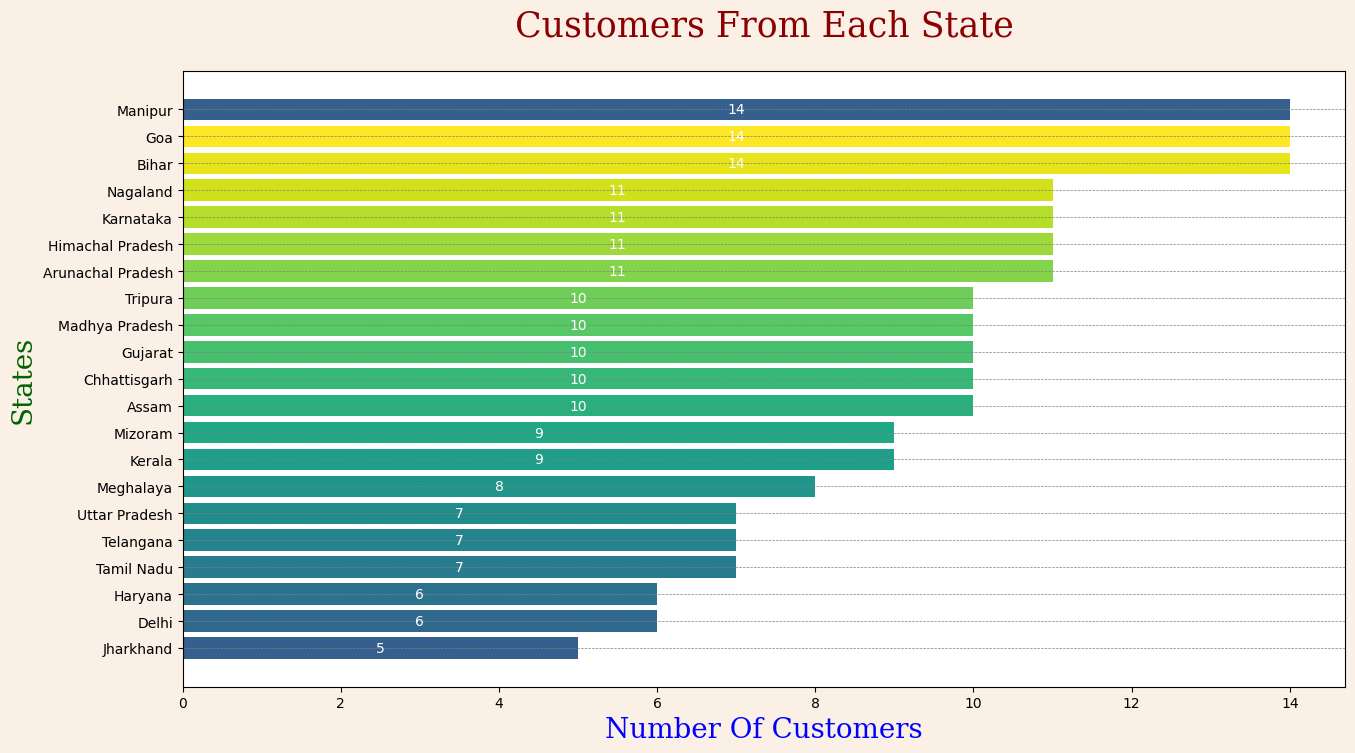

In [102]:
#Sql Query
query='''select State,count(distinct(CustomerID))  as Num_Cust
from customers
group by State
order by Num_Cust;'''

#Execute Query
C_state=read_query(query=query)

#Creating Variables
states=C_state['State'].values
N_cust=C_state['Num_Cust'].astype(int).values


#Cmap
cmap_value=np.linspace(0.3,1,20)
cmap=plt.cm.viridis(cmap_value)

#Fonts
font={'family':'serif','size':25,'color':'darkred'}
fontx={'family':'serif','size':20,'color':'blue'}
fonty={'family':'serif','size':20,'color':'darkgreen'}

#Ploting Graph
plt.figure(figsize=(15,8),facecolor='linen')
#plt.plot(N_cust,states,color='darkred',marker='o')
plt.barh(y=states,width=N_cust,color=cmap)
plt.title('Customers From Each State',pad=25,fontdict=font)
plt.xlabel('Number Of Customers',fontdict=fontx)
plt.ylabel('States',fontdict=fonty)

#Annotating Graph
for i in range(len(N_cust)):
    plt.annotate(text=N_cust[i],xy=(N_cust[i]/2,i),
                 horizontalalignment='center',
                 verticalalignment='center',color='white')

#Gridlines
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 8. What is the average quantity of each product sold?

In [47]:
query='''select 
	c.SubcatName,avg(s.Quantity) as Avg_quantity ,sum(s.TotalPrice) as Total_sales
from
	subcategories c
join
	salesdata s
on 
	c.SubcatID=s.SubcatID
group by 
	c.SubcatName
order by
	Avg_quantity desc;'''

Avg_quant=read_query(query=query)
Avg_quant

,SubcatName,Avg_quantity,Total_sales
0,Resistance bands,3.1587,74113908.00
1,Workbooks,3.1496,52234917.00
2,Camping tent,3.1071,28368555.00
3,Foam roller,3.0980,17319951.00
4,Portable power banks,3.0974,49866057.00
5,Laptops,3.0821,112563616.00
6,Bicycle,3.0703,72677907.00
7,Dog/cat food,3.0673,49319310.00
8,Fiction novels,3.0637,99827500.00
9,Pet beds,3.0504,119604888.00


# 9. Which supplier has the highest total sales?

In [48]:
query='''select s.SupplierID,s.SupplierName ,sum(t.TotalPrice) as Total_sales
from suppliers s
join (select c.SupplierID,s.TotalPrice
from salesdata s
join subcategories c
on s.SubcatID=c.SubcatID) t
on s.SupplierID=t.SupplierID
group by s.SupplierID 
order by Total_sales desc;'''

S_sales=read_query(query=query)
S_sales

,SupplierID,SupplierName,Total_sales
0,3040,Dora-Aggarwal,180265340.00
1,3004,Agate-Kalita,141629408.00
2,3002,"Sridhar, Sidhu and Maharaj",124268051.00
3,3003,"Sahota, Khurana and Kumar",119604888.00
4,3074,Date-Mander,117152046.00
5,3078,Verma-Vig,112563616.00
6,3075,"Kapur, Acharya and Wadhwa",98842528.00
7,3073,"Sastry, Bali and Deshmukh",86990482.00
8,3069,Mall Group,82034102.00
9,3080,"Khare, Boase and Gole",80254640.00


# 10. What is the total revenue generated from sales in each state?

In [49]:
query='''select c.State,sum(s.TotalPrice) as T_revenue
from customers c
join salesdata s
on c.CustomerID=s.CustomerID
group by c.State
order by T_revenue desc;'''

S_rev=read_query(query=query)
S_rev

,State,T_revenue
0,Goa,126990041.00
1,Bihar,126103984.00
2,Manipur,122908203.00
3,Himachal Pradesh,102905140.00
4,Karnataka,99671386.00
5,Arunachal Pradesh,97340033.00
6,Tripura,92329290.00
7,Madhya Pradesh,91859171.00
8,Gujarat,91624425.00
9,Chhattisgarh,91546717.00


# 11. How many sales were made by each customer?

In [50]:
query='''select CustomerID,count(CustomerID) 
from salesdata
group by CustomerID
order by count(CustomerID) desc;'''

S_cust=read_query(query=query)
S_cust

,CustomerID,count(CustomerID)
0,C-2023-100-13,85
1,C-2023-100-130,81
2,C-2023-100-197,81
3,C-2023-100-88,78
4,C-2023-100-57,77
...,...,...
195,C-2023-100-138,46
196,C-2023-100-103,45
197,C-2023-100-150,44
198,C-2023-100-9,44


# 12. What is the total salary expenditure on employees in each department?

In [51]:
query='''select Department,sum(Salary) 
from employees
group by Department;'''

D_salary=read_query(query=query)
D_salary

,Department,sum(Salary)
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92
5,ML Engineer,652081.28
6,HR Admin,482618.09
7,Engineering,393266.08
8,Analyst,732044.77
9,IT,351627.51


# 14. What is the total revenue generated from sales in each category?

In [52]:
query = '''select t.CategoryID, c.CategoryName, sum(t.TotalPrice) as Cat_revenue
from categories c
join (select b.CategoryID,s.TotalPrice
from salesdata s
join subcategories b
on s.SubcatID=b.SubcatID) t
on c.CategoryID=t.CategoryID
group by t.CategoryID,c.CategoryName;'''

C_rev=read_query(query=query)
C_rev

,CategoryID,CategoryName,Cat_revenue
0,500100,Electronics and Gadgets,319374417.00
1,500101,Home and Kitchen Appliances,269316684.00
2,500102,Outdoor and Sports Equipment,231074739.00
3,500103,Health and Wellness Products,324761329.00
4,500104,Books and Educational Materials,282897933.00
5,500105,Pet Supplies and Accessories,361848986.00


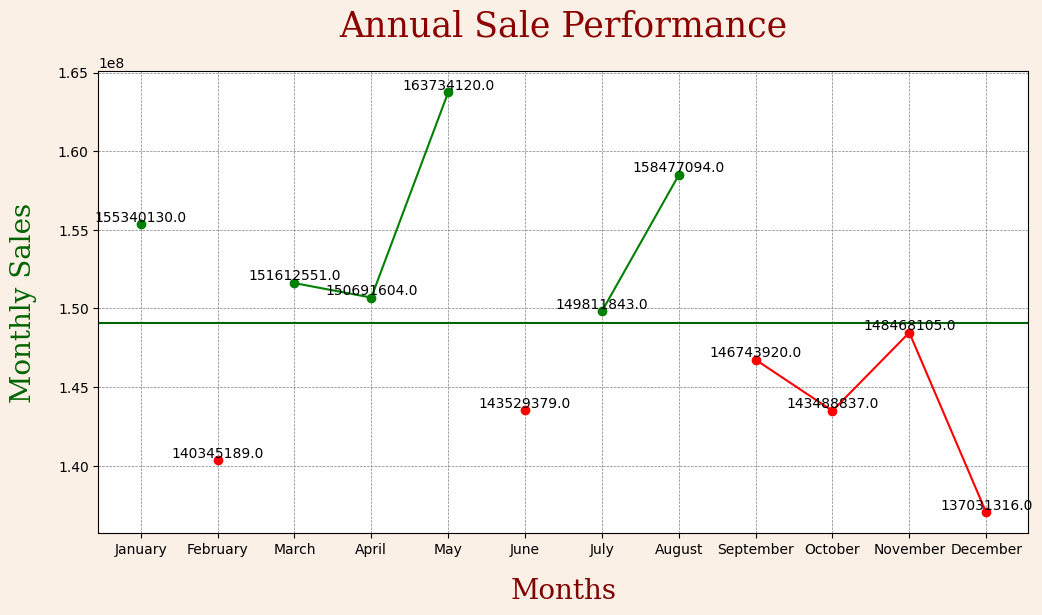

In [53]:
query='''select Months , M_sales
        from (select month(SaleDate),monthname(SaleDate) as Months,sum(TotalPrice) as M_sales
from salesdata
group by month(SaleDate),Months
order by month(SaleDate)) t;'''

df = read_query(query=query)
df
Months = df['Months'].values
df['M_sales']=df['M_sales'].astype(float)
Monthly_sales=df['M_sales'].values
Monthly_sales

monthly_avg=df['M_sales'].mean()
plt.figure(figsize=(12,6),facecolor='linen')

font={'family':'serif','size':25,'color':'darkred'}
fontx={'family':'serif','size':20,'color':'maroon'}
fonty={'family':'serif','size':20,'color':'darkgreen'}

above_monthlysale=[sales if sales>monthly_avg else None for sales in Monthly_sales]
below_monthlysale=[sales if sales<=monthly_avg else None for sales in Monthly_sales]


plt.plot(Months,above_monthlysale,color="green",marker='o')
plt.plot(Months,below_monthlysale,color="red",marker='o')
plt.title('Annual Sale Performance',fontdict=font,pad=25)
plt.xlabel("Months",fontdict=fontx,labelpad=15)
plt.ylabel("Monthly Sales",fontdict=fonty,labelpad=15)
plt.axhline(y=monthly_avg,color='darkgreen')
for i in range(len(Months)):
    plt.annotate(text=Monthly_sales[i],xy=(i,Monthly_sales[i]),
                horizontalalignment='center',
                verticalalignment='bottom')

plt.grid(linestyle='--',color='gray',linewidth=0.5)
plt.show()

In [54]:
above_monthlysale=[sales if sales>monthly_avg else None for sales in Monthly_sales]
below_monthlysale=[sales if sales<=monthly_avg else None for sales in Monthly_sales]
above_monthlysale
below_monthlysale

[None,
 140345189.0,
 None,
 None,
 None,
 143529379.0,
 None,
 None,
 146743920.0,
 143488837.0,
 148468105.0,
 137031316.0]

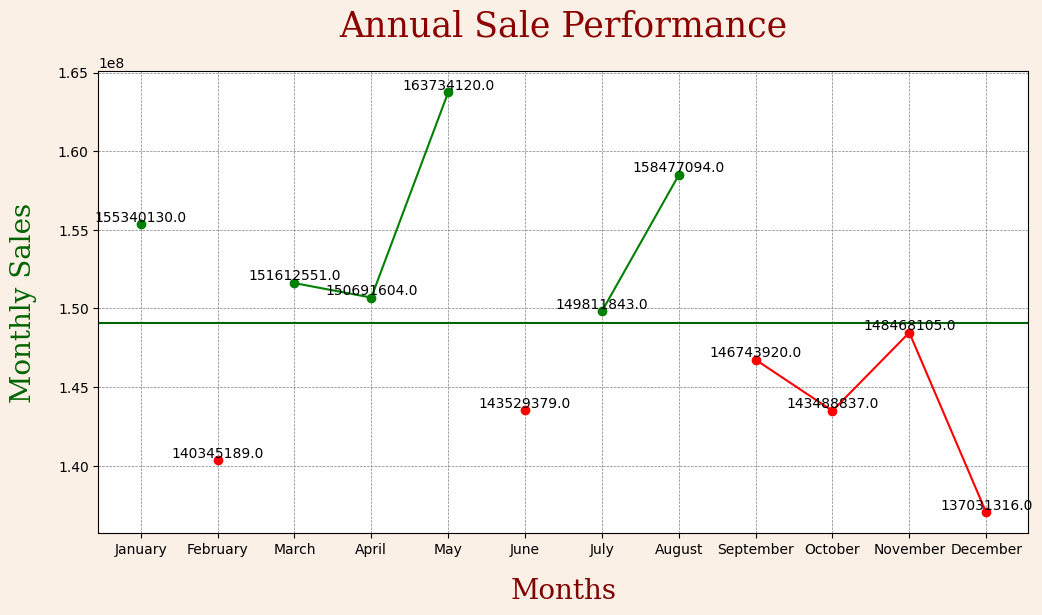

In [55]:
query = '''select Months , M_sales
           from (select month(SaleDate),monthname(SaleDate) as Months,sum(TotalPrice) as M_sales
                 from salesdata
                 group by month(SaleDate),Months
                 order by month(SaleDate)) t;'''

df = read_query(query=query)
df['M_sales'] = df['M_sales'].astype(float)

Months = df['Months']
Monthly_sales = df['M_sales']
monthly_avg = Monthly_sales.mean()

plt.figure(figsize=(12, 6), facecolor='linen')

plt.plot(Months, np.where(Monthly_sales > monthly_avg, Monthly_sales, None), color="green", marker='o')
plt.plot(Months, np.where(Monthly_sales <= monthly_avg, Monthly_sales, None), color="red", marker='o')

plt.title('Annual Sale Performance', fontdict={'family': 'serif', 'size': 25, 'color': 'darkred'}, pad=25)
plt.xlabel("Months", fontdict={'family': 'serif', 'size': 20, 'color': 'maroon'}, labelpad=15)
plt.ylabel("Monthly Sales", fontdict={'family': 'serif', 'size': 20, 'color': 'darkgreen'}, labelpad=15)
plt.axhline(y=monthly_avg, color='darkgreen')

for x, y in zip(Months, Monthly_sales):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.grid(linestyle='--', color='gray', linewidth=0.5)
plt.show()
